# Petit retour sur les spectres

**Question** Créer les matrices d'ajacence correspondant aux graphes suivants: 
- un graphe complet de 100 noeuds
- un cercle de 100 noeuds
- un 100-barbell : graphe composé de deux cliques de 50 noeuds reliés par une arête

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [22]:
def complet(n):
    X = np.ones((n,n))
    np.fill_diagonal(X, 0)
    return X

adj_complet = complet(100)

In [23]:
def cercle(n):
    X = np.roll(np.eye(n), -1, axis=0) + np.roll(np.eye(n), 1, axis=0)
    return X

adj_cercle = cercle(100)

In [43]:
def barbel(n):
    zeros = np.zeros((n,n))
    right = np.hstack((zeros,complet(n)))
    left = np.hstack((complet(n),zeros))
    combine = np.vstack((left,right))
    combine[n-1][n] = 1
    combine[n][n-1] = 1
    return combine

In [34]:
def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500)
    plt.show()

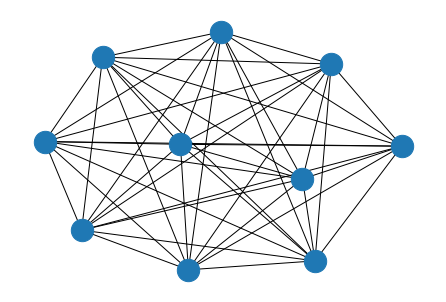

In [41]:
show_graph_with_labels(complet(10))

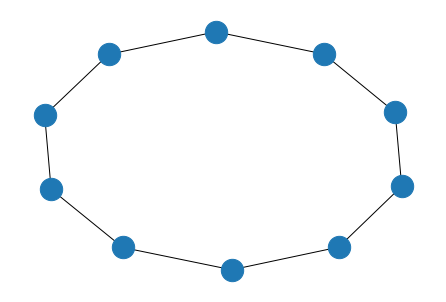

In [42]:
show_graph_with_labels(cercle(10))

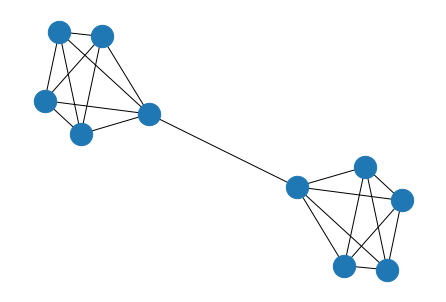

In [40]:
show_graph_with_labels(barbel(5))

**Question** Calculer pour chacun des graphes la matrice stochastique avec undamping factor de 0.99 

In [45]:
Ps=dict()
As=dict()

functions=[complet,cercle,barbel]

for m in functions:
    n = m.__name__
    As[n] = m(10)
    P = As[n]/As[n].sum(axis=1)[:,np.newaxis]
    Ps[n] = 0.99*P+0.01/100
    
Ps

{'complet': array([[1.000e-04, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01,
         1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.000e-04, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01,
         1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.101e-01, 1.000e-04, 1.101e-01, 1.101e-01, 1.101e-01,
         1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.101e-01, 1.101e-01, 1.000e-04, 1.101e-01, 1.101e-01,
         1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.000e-04, 1.101e-01,
         1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.000e-04,
         1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01,
         1.000e-04, 1.101e-01, 1.101e-01, 1.101e-01],
        [1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01, 1.101e-01,
         1.

**Question** Calculer les vecteurs de Perron de ces graphes.

**Question** Regadez en combien d'étapes l'itération donne ce résultat. 

**Question** Pour chaque type de graphe calculer la différence entre la plus grande et la seconde plus grande valeur propre. 

**Question** Recommencez avec un damping factor plus grand (0.85)